In [3]:
import pandas as pd

train_df = pd.read_csv('../data/open(법원 판결 예측)/train.csv')
test_df = pd.read_csv('../data/open(법원 판결 예측)/train.csv')
print(train_df.shape)
print(test_df.shape)

(2478, 5)
(2478, 5)


In [4]:
train_df.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [5]:
train_df.drop(['ID', 'first_party', 'second_party'], axis = 1, inplace = True)
train_df.head()

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [7]:
train_df.isnull().sum()

facts                 0
first_party_winner    0
dtype: int64

In [9]:
train_df.duplicated().sum()

0

In [10]:
print(f'First party win= {round(train_df["first_party_winner"].value_counts()[0]/len(train_df) * 100,3)}%')
print(f'First party lose = {round(train_df["first_party_winner"].value_counts()[1]/len(train_df) * 100,3)}%')

First party win= 33.454%
First party lose = 66.546%


In [12]:
import nltk
train_df['num_chars'] = train_df['facts'].apply(len)
train_df.head()

,facts,first_party_winner,num_chars
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1,1092
1,Ramon Nelson was riding his bike when he suffe...,0,1180
2,An Alabama state court convicted Billy Joe Mag...,1,1112
3,Victor Linkletter was convicted in state court...,0,356
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1,1067


In [14]:
#단어수 확인
train_df['num_words'] = train_df['facts'].apply(lambda x: len(nltk.word_tokenize(x)))
train_df.head()

,facts,first_party_winner,num_chars,num_words
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1,1092,201
1,Ramon Nelson was riding his bike when he suffe...,0,1180,219
2,An Alabama state court convicted Billy Joe Mag...,1,1112,191
3,Victor Linkletter was convicted in state court...,0,356,59
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1,1067,200


In [15]:
#문장 수
train_df['num_sentences'] = train_df['facts'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_df.head()

,facts,first_party_winner,num_chars,num_words,num_sentences
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1,1092,201,7
1,Ramon Nelson was riding his bike when he suffe...,0,1180,219,7
2,An Alabama state court convicted Billy Joe Mag...,1,1112,191,8
3,Victor Linkletter was convicted in state court...,0,356,59,3
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1,1067,200,9


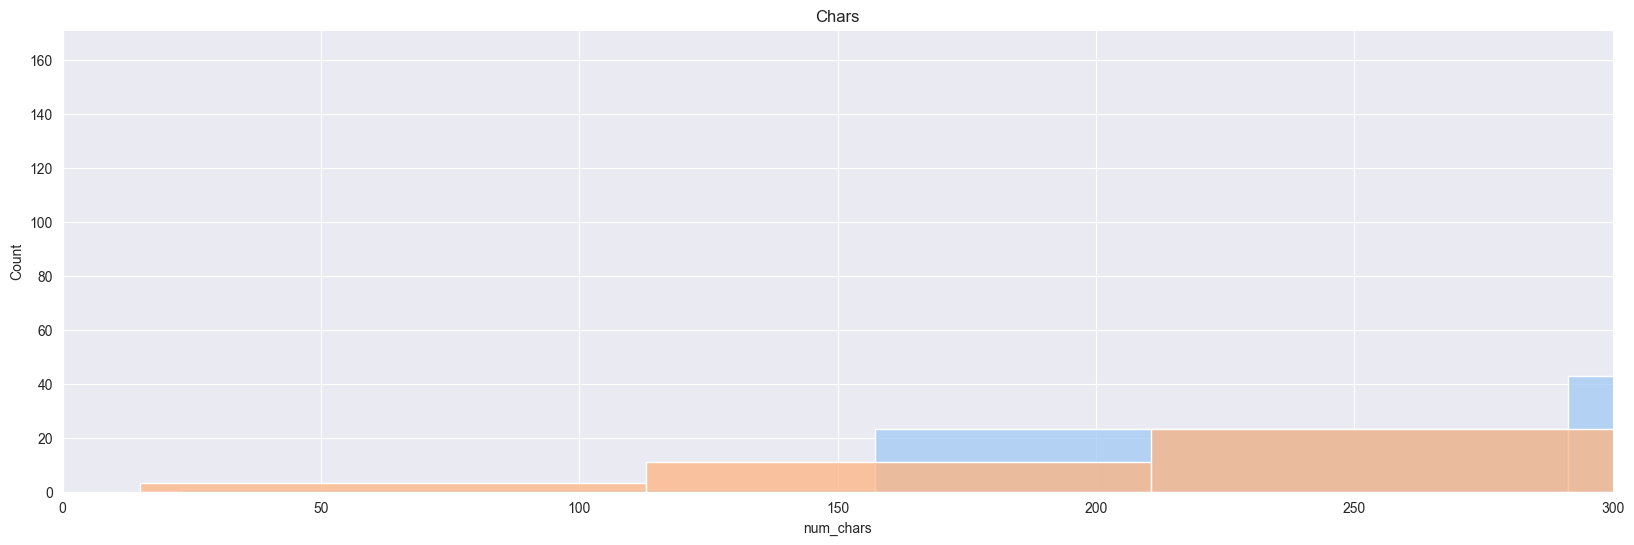

In [16]:
# 글자 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

df = train_df
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['first_party_winner'] == 0]['num_chars'])
sns.histplot(df[df['first_party_winner'] == 1]['num_chars'])
plt.xlim(0, 300)
plt.title('Chars')
plt.show()

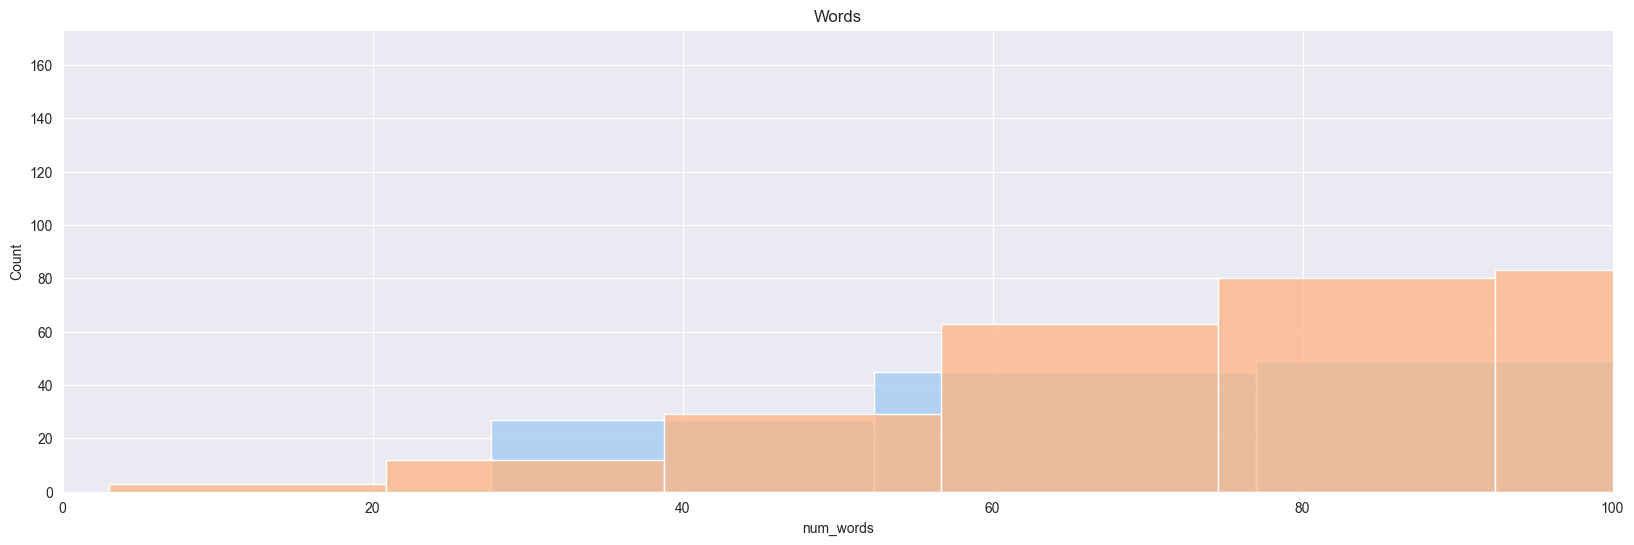

In [17]:
# 단어 데이터 시각화
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['first_party_winner'] == 0]['num_words'])
sns.histplot(df[df['first_party_winner'] == 1]['num_words'])
plt.xlim(0, 100)
plt.title('Words')
plt.show()

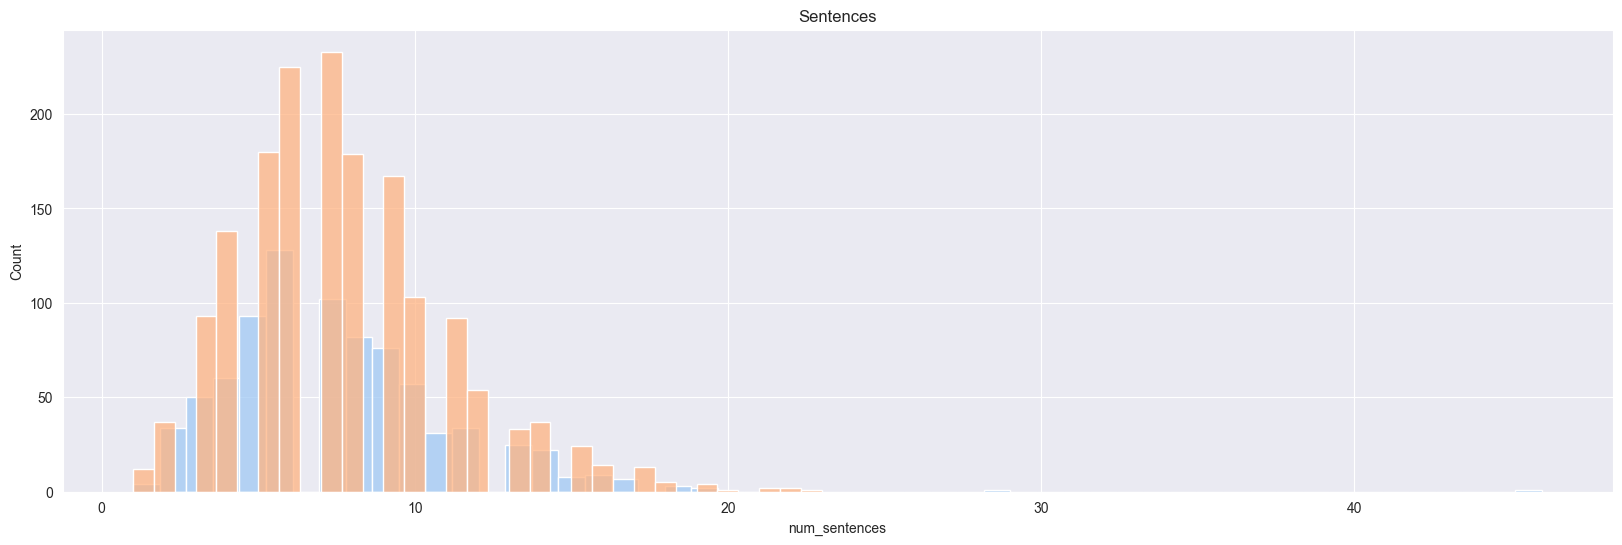

In [18]:
#문장 시각화

sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['first_party_winner'] == 0]['num_sentences'])
sns.histplot(df[df['first_party_winner'] == 1]['num_sentences'])
plt.title('Sentences')
plt.show()

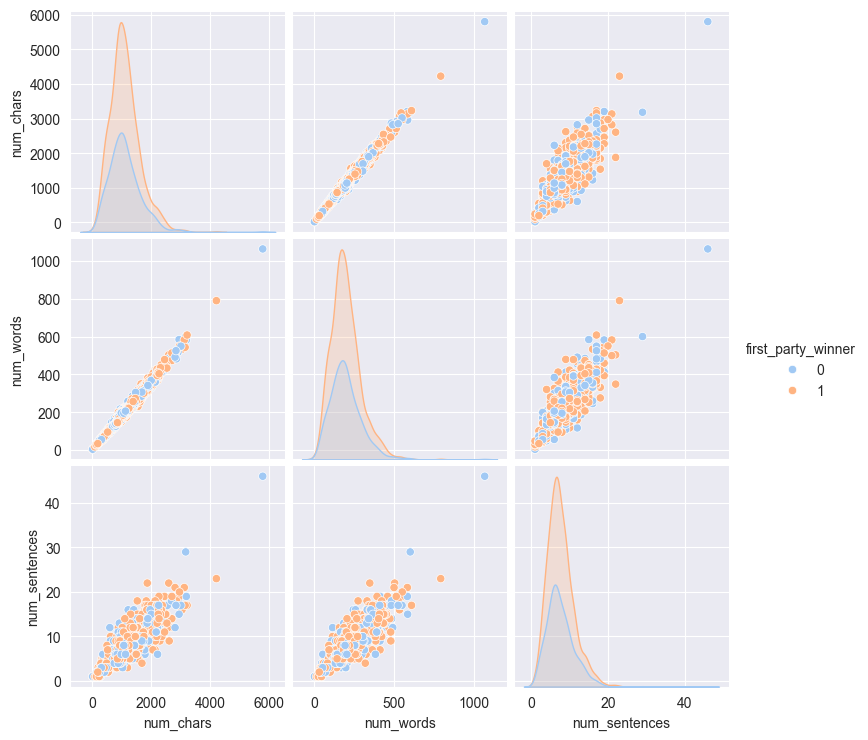

In [19]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(df, hue='first_party_winner')
plt.show()

<Axes: >

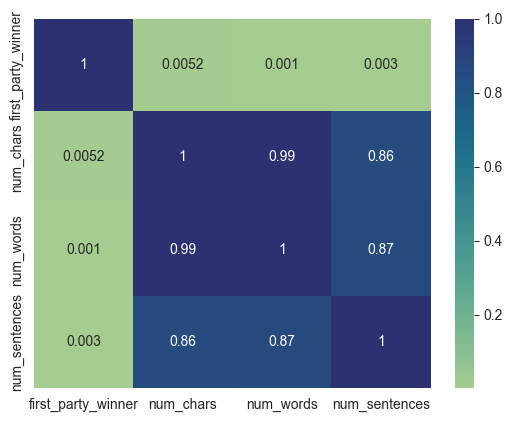

In [20]:
import numpy as np
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.corr()
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')

In [21]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# 보고자 하는 것만 보게해줌
#불용어 처리
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

transform_text('I am learning Python and I am learning Machine Learning')

'learn python learn machin learn'

In [23]:
transform_text(df['facts'][0])

'june 27 1962 phil amant candid public offic made televis speech baton roug louisiana speech amant accus polit oppon communist involv crimin activ head local teamster union final amant implic herman thompson east baton roug deputi sheriff scheme move money teamster union amant polit oppon thompson success su amant defam louisiana first circuit court appeal revers hold thompson show amant act thompson appeal suprem court louisiana court held although public figur forfeit first amend protect defam amant accus thompson crime utter disregard whether remark true final court held first amend protect uninhibit robust debat rather open season shoot good name anyon happen public servant'

In [24]:
df['transformed_text'] = df['facts'].apply(transform_text)
df.head()

,facts,first_party_winner,num_chars,num_words,num_sentences,transformed_text
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1,1092,201,7,june 27 1962 phil amant candid public offic ma...
1,Ramon Nelson was riding his bike when he suffe...,0,1180,219,7,ramon nelson ride bike suffer lethal blow back...
2,An Alabama state court convicted Billy Joe Mag...,1,1112,191,8,alabama state court convict billi joe magwood ...
3,Victor Linkletter was convicted in state court...,0,356,59,3,victor linklett convict state court evid illeg...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1,1067,200,9,april 24 1953 selma alabama intrud broke apart...
